In [7]:
import pandas as pd 

df = pd.read_csv('train.csv')

df = df[['Unnamed: 0', 'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]

df.head()

,Unnamed: 0,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,1,43,24,M,1,1,1,4,1,NaN,...,80.0,520.0,D,D,C,A,A,C,H,A
1,2,23,17,F,3,1,2,0,2,1.0,...,80.0,580.0,A,A,B,A,A,A,NaN,A
2,3,23,21,F,3,1,3,0,1,NaN,...,NaN,NaN,D,D,C,A,A,A,NaN,A
3,4,33,25,F,0,1,1,9,1,NaN,...,NaN,NaN,H,E,E,C,B,C,F,D
4,5,13,28,M,2,1,1,4,1,NaN,...,NaN,NaN,E,D,C,A,A,B,F,A


In [8]:
df = df[(df['TP_PRESENCA_MT'] == 1)].copy()

df.drop(['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027'], axis=1, inplace=True)

In [9]:
df['NU_NOTA_CN'].fillna(df['NU_NOTA_CN'].mean(), inplace=True)
df['NU_NOTA_CH'].fillna(df['NU_NOTA_CH'].mean(), inplace=True)

df['NOTA_GERAL'] = df['NU_NOTA_CN'] + df['NU_NOTA_REDACAO'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC']

In [10]:
lista_encoder = ['TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']

In [11]:
from sklearn.preprocessing import LabelEncoder
import pickle as pkl

for i in lista_encoder:
    le = LabelEncoder()
    le.fit(df[i])
    df[i] = le.transform(df[i])
    
    file = open(f'encoder_{i}.pkl', 'wb')
    pkl.dump(le, file)
    file.close()

In [12]:
y = df.iloc[:,25].copy()
df.drop(['NU_NOTA_MT', 'TP_PRESENCA_MT'], axis = 1, inplace=True)

x = df.iloc[:,1:]

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)
y_pred = lr.predict(x_test)

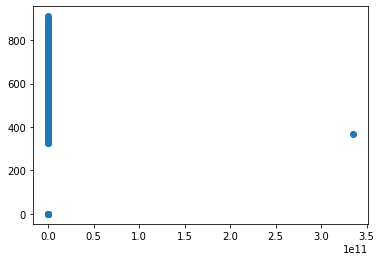

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.show()

In [16]:
from sklearn.metrics import r2_score

r2_score(y_pred,y_test)

-0.0002961214782997157

# DF TEST

In [17]:
df_test = pd.read_csv('test.csv')
df_test.drop(['SG_UF_RESIDENCIA'], axis=1, inplace=True)
df_test.drop(['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027'], axis=1, inplace=True)
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,22,F,3,1,1,5,1,0,...,100.0,40.0,420.0,B,A,C,A,A,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,26,F,3,1,1,8,1,0,...,120.0,100.0,580.0,E,B,C,B,B,B,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,21,M,1,1,2,0,2,0,...,80.0,80.0,320.0,E,E,D,B,B,A,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,27,F,3,1,1,8,1,0,...,NaN,NaN,NaN,H,E,G,B,B,A,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,18,M,1,1,2,0,2,0,...,80.0,0.0,320.0,D,H,H,C,B,A,A


In [18]:
lista_nan = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

for col in lista_nan:
    df_test[col].fillna(df_test[col].mean(), inplace=True)

In [19]:
lista_encoder = ['TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']

for i in lista_encoder:
    with open(f'encoder_{i}.pkl', 'rb') as f:
        le = pkl.load(f)
    
    df_test[i] = le.transform(df_test[i])
    
df_test['NOTA_GERAL'] = df_test['NU_NOTA_CN'] + df_test['NU_NOTA_REDACAO'] + df_test['NU_NOTA_CH'] + df_test['NU_NOTA_LC']

In [20]:
x = df_test[['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
          'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q047', 'NOTA_GERAL']].copy()

In [21]:
y_pred = lr.predict(x)
df_test['NU_NOTA_MT'] = y_pred

In [22]:
df_test[['NU_INSCRICAO', 'NU_NOTA_MT']].to_csv('answer.csv', index=False)